
# EE695 homework4-5

By@Liyan Chen Date:2018/12/3 Email:lchen39@stevens.edu

This homework is to build a neural network using backpropagation to predict survived condition for Titanic.

This project builds a Multi-Layer Perceptron and Backprepagation classifier,using the K-Fold cross‐validation to find the best parameters.

Output file is 'Performance_comparence.png'.

In [2]:
print('================Import the Titanic data==================')
print('\n')
import numpy as np
import pandas as pd

print('Loading in data......','\n')
TitanicData = open('Titanic.csv', 'r')
titanic = pd.read_csv(TitanicData)

print('================Pre-process the data==================')

print('Selecting the columns','\n')
titanic_data = titanic[['pclass','sex','age','sibsp','survived']]

print('Titanic passenger data information')
print(titanic_data.info(),'\n')

print('Omiting all NA examples','\n')
titanic_data['age'].fillna('NA', inplace=True)
ex_list = list(titanic_data.age)
ex_list = [x for x in ex_list if x != 'NA']
df = titanic_data[titanic_data.age.isin(ex_list)]
print(df.info(),'\n')

# design matrix
feature = df[['pclass','sex','age','sibsp']]
# target label
target = df['survived']

# extract the 'object' data
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
feature = vec.fit_transform(feature.to_dict(orient='record'))
print('feature names :',vec.feature_names_,'\n')
print(feature.shape,'\n')


print('================Build MLP classifier==================')
print('\n')

print('Building a MLP classifier......','\n')
# Random choose 70% of the data for training set and other 30% for test
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.3, random_state=33)

# Set the sigmoid function as the activation function
# Set 2 hidden layers with 100 neurons in each layer
# Use SGD solver
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', alpha=1e-05,hidden_layer_sizes=(100,),
              learning_rate='invscaling', learning_rate_init=0.1,power_t=0.1,momentum=0.9,solver='sgd')
clf.fit(X_train, Y_train)
Y_predict1 = clf.predict(X_train)
Y_predict2 = clf.predict(X_test)

# Report details
from sklearn.metrics import classification_report,precision_recall_fscore_support

print('In‐sample accuracy report:')
print(classification_report(Y_predict1, Y_train, target_names=['died','survived']),'\n')

print('Out‐sample accuracy report:')
print(classification_report(Y_predict2, Y_test, target_names=['die','survived']),'\n')

Input_report1 = precision_recall_fscore_support(Y_predict1, Y_train)
Output_report1 = precision_recall_fscore_support(Y_predict2, Y_test)
print('In‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Input_report1[0][0]*100))
print('In‐sample percent survivors correctly predicted (on training set) :','%.2f%%' % (Input_report1[0][1]*100))
print('Out‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Output_report1[0][0]*100))
print('Out‐sample percent survivors correctly predicted (on test set) :','%.2f%%' % (Output_report1[0][1]*100),'\n')


================Import the Titanic data==================


Loading in data...... 

================Pre-process the data==================
Selecting the columns 

Titanic passenger data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
pclass      1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
survived    1309 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 51.2+ KB
None 

Omiting all NA examples 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 5 columns):
pclass      1046 non-null object
sex         1046 non-null object
age         1046 non-null object
sibsp       1046 non-null int64
survived    1046 non-null int64
dtypes: int64(2), object(3)
memory usage: 49.0+ KB
None 



c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


feature names : ['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male', 'sibsp'] 

(1046, 7) 

================Build MLP classifier==================


Building a MLP classifier...... 

In‐sample accuracy report:
             precision    recall  f1-score   support

       died       0.87      0.81      0.84       464
   survived       0.70      0.79      0.74       268

avg / total       0.81      0.80      0.80       732
 

Out‐sample accuracy report:
             precision    recall  f1-score   support

        die       0.82      0.82      0.82       187
   survived       0.73      0.73      0.73       127

avg / total       0.78      0.78      0.78       314
 

In‐sample percent fatalities correctly predicted (on training set) : 86.81%
In‐sample percent survivors correctly predicted (on training set) : 70.33%
Out‐sample percent fatalities correctly predicted (on training set) : 81.82%
Out‐sample percent survivors correctly predicted (on test set) : 73.23% 



c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


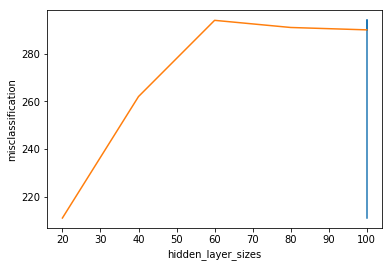

best score: 0.711749
best parameters:
hidden_layer_sizes (100, 20)
test score: 0.786624


In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score
# Control the parameters

# Test the 'hidden_layer_seizes'
parameters = {'hidden_layer_sizes':[(100,20),(100,40),(100,60),(100,80),(100,100)]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['hidden_layer_sizes'][i] for i in range(5)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(5)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('hidden_layer_sizes')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "hidden_layer_sizes" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

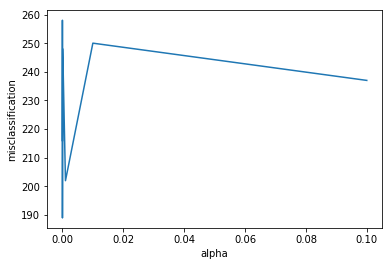

best score: 0.741803
best parameters:
alpha 1e-05
test score: 0.786624


In [7]:
# Test the 'alpha'
parameters = {'alpha':[0.1,0.01,0.001,1e-04,1e-05,1e-06,1e-07,1e-08]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['alpha'][i] for i in range(8)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(8)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('alpha')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "alpha" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

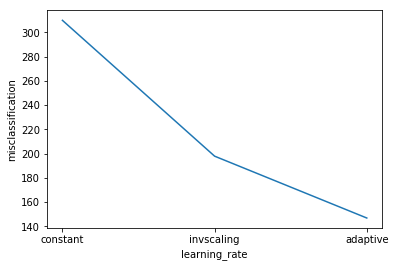

best score: 0.799180
best parameters:
learning_rate adaptive
test score: 0.605096


In [9]:
# Test the 'learning_rate'
parameters = {'learning_rate':['constant', 'invscaling', 'adaptive']}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['learning_rate'][i] for i in range(3)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(3)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('learning_rate')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "learning_rate" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


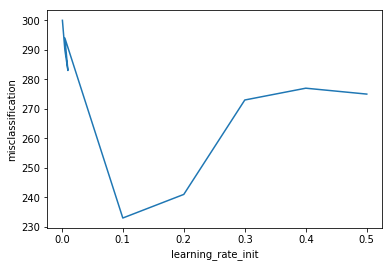

best score: 0.681694
best parameters:
learning_rate_init 0.1
test score: 0.735669


In [8]:
# Test the 'learning_rate_init'
parameters = {'learning_rate_init':[0.001,0.005,0.01,0.005,0.1,0.2,0.3,0.4,0.5]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['learning_rate_init'][i] for i in range(9)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(9)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('learning_rate_init')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "learning_rate_init" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochasti

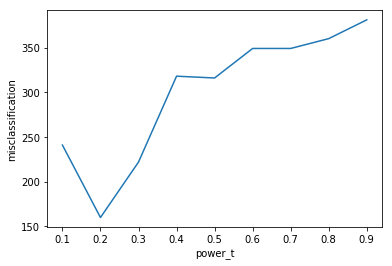

best score: 0.781421
best parameters:
power_t 0.2
test score: 0.815287


In [10]:
# Test the 'power_t'
parameters = {'power_t':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['power_t'][i] for i in range(9)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(9)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('power_t')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "power_t" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

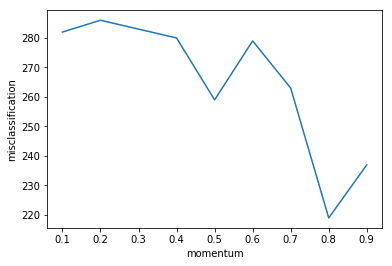

best score: 0.700820
best parameters:
momentum 0.8
test score: 0.493631


In [11]:
# Test the 'momentum'
parameters = {'momentum':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

X = [parameters['momentum'][i] for i in range(9)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(9)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('momentum')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "momentum" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, Y_test))

In [7]:
# Combine parameters
parameters = {'hidden_layer_sizes':[(100,20)],
              'alpha':[1e-05],
              'learning_rate':['constant', 'invscaling', 'adaptive'],
              'learning_rate_init':[0.1,0.2,0.3,0.4,0.5],
              'power_t':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              'momentum':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
             }
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, Y_train)
result = clf_new.best_estimator_

print('best score: %f'%clf_new.best_score_)
print('best parameters:')
for key in parameters.keys():
        print(key, result.get_params()[key])
print('test score: %f'%result.score(X_test, Y_test))

c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochasti

c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochasti

c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochasti

best score: 0.806011
best parameters:
hidden_layer_sizes (100, 20)
alpha 1e-05
learning_rate adaptive
learning_rate_init 0.2
power_t 0.4
momentum 0.9
test score: 0.789809


In [12]:
print('================Build optimal MLP classifier==================')
print('\n')

clf_opt = MLPClassifier(activation='logistic', alpha=1e-05,hidden_layer_sizes=(100,20),
              learning_rate='adaptive', learning_rate_init=0.2,power_t=0.4,momentum=0.9,solver='sgd')
clf_opt.fit(X_train, Y_train)
Y_predict_mpl_1 = clf.predict(X_train)
Y_predict_mpl_2 = clf.predict(X_test)

# Report details

print('In‐sample accuracy report:')
mlp_report1 = classification_report(Y_predict_mpl_1, Y_train, target_names=['died','survived'])
print(mpl_report1,'\n')

print('Out‐sample accuracy report:')
mlp_report2 = classification_report(Y_predict_mpl_2, Y_test, target_names=['die','survived'])
print(mpl_report2,'\n')

Input_mlp_report = precision_recall_fscore_support(Y_predict_mpl_1, Y_train)
Output_mlp_report = precision_recall_fscore_support(Y_predict_mpl_2, Y_test)
print('In‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Input_mlp_report[0][0]*100))
print('In‐sample percent survivors correctly predicted (on training set) :','%.2f%%' % (Input_mlp_report[0][1]*100))
print('Out‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Output_mlp_report[0][0]*100))
print('Out‐sample percent survivors correctly predicted (on test set) :','%.2f%%' % (Output_mlp_report[0][1]*100),'\n')


================Build optimal MLP classifier==================


In‐sample accuracy report:
             precision    recall  f1-score   support

       died       0.87      0.80      0.84       466
   survived       0.70      0.79      0.74       266

avg / total       0.81      0.80      0.80       732
 

Out‐sample accuracy report:
             precision    recall  f1-score   support

        die       0.82      0.82      0.82       187
   survived       0.74      0.74      0.74       127

avg / total       0.79      0.79      0.79       314
 

In‐sample percent fatalities correctly predicted (on training set) : 86.81%
In‐sample percent survivors correctly predicted (on training set) : 69.67%
Out‐sample percent fatalities correctly predicted (on training set) : 82.35%
Out‐sample percent survivors correctly predicted (on test set) : 74.02% 



In [11]:
print('================Build the pruned decision tree in homework3==================')
print('\n')
from sklearn.tree import DecisionTreeClassifier

tree_optimal = DecisionTreeClassifier(max_leaf_nodes = 7)
tree_optimal.fit(X_train, Y_train)
Y_predict_tree_1 = tree_optimal.predict(X_train)
Y_predict_tree_2 = tree_optimal.predict(X_test)

# Report Details
print('In‐sample accuracy report:')
print(classification_report(Y_predict_tree_1, Y_train, target_names=['died','survived']),'\n')

print('Out‐sample accuracy report:')
print(classification_report(Y_predict_tree_2, Y_test, target_names=['die','survived']),'\n')

Input_tree_report = precision_recall_fscore_support(Y_predict_tree_1, Y_train)
Output_tree_report = precision_recall_fscore_support(Y_predict_tree_2, Y_test)
print('In‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Input_tree_report[0][0]*100))
print('In‐sample percent survivors correctly predicted (on training set) :','%.2f%%' % (Input_tree_report[0][1]*100))
print('Out‐sample percent fatalities correctly predicted (on training set) :','%.2f%%' % (Output_tree_report[0][0]*100))
print('Out‐sample percent survivors correctly predicted (on test set) :','%.2f%%' % (Output_tree_report[0][1]*100),'\n')

================Build the pruned decision tree in homework3==================


In‐sample accuracy report:
             precision    recall  f1-score   support

       died       0.87      0.82      0.85       457
   survived       0.73      0.80      0.77       275

avg / total       0.82      0.82      0.82       732
 

Out‐sample accuracy report:
             precision    recall  f1-score   support

        die       0.82      0.82      0.82       188
   survived       0.73      0.74      0.74       126

avg / total       0.79      0.79      0.79       314
 

In‐sample percent fatalities correctly predicted (on training set) : 87.27%
In‐sample percent survivors correctly predicted (on training set) : 73.33%
Out‐sample percent fatalities correctly predicted (on training set) : 82.35%
Out‐sample percent survivors correctly predicted (on test set) : 73.23% 



================Performance comparence==================


c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\31588\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\31588\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\31588\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()

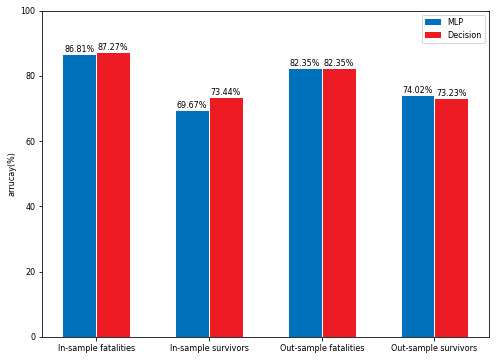

In [29]:
print('================Performance comparence==================')

import matplotlib as mpl
mpl.use('Agg')

names = ('MLP','Decision')
subjects = ('In‐sample fatalities','In‐sample survivors','Out‐sample fatalities','Out‐sample survivors')
scores = ((86.81,69.67,82.35,74.02),(87.27,73.44,82.35,73.23))

font_size = 8
fig_size = (8, 6)
mpl.rcParams['font.size'] = font_size
mpl.rcParams['figure.figsize'] = fig_size

bar_width = 0.30
index = np.arange(len(scores[0]))

rects1 = plt.bar(index, scores[0], bar_width, color='#0072BC', label=names[0])
rects2 = plt.bar(index + bar_width, scores[1], bar_width, color='#ED1C24', label=names[1])


plt.xticks(index+0.5*bar_width, subjects)
plt.ylim(ymax=100, ymin=0)
plt.ylabel("arrucay(%)") 

plt.legend()
 

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height,str(height)+'%', ha='center', va='bottom')
        rect.set_edgecolor('white')
 
add_labels(rects1)
add_labels(rects2)
 

plt.savefig('performance_comparence.png')
plt.show()